<a href="https://colab.research.google.com/github/Fissureee/PCVK/blob/main/Jobsheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


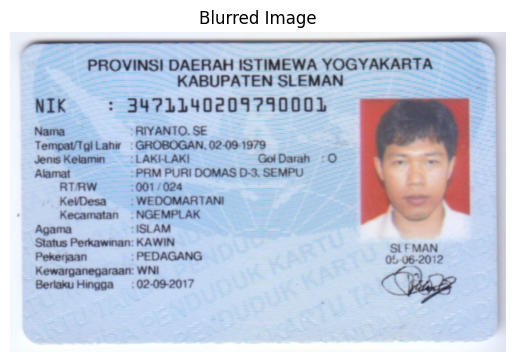

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the single image file
file_path = "/content/drive/MyDrive/PCVK_assets/ktp.png"

# Load the image
src = cv2.imread(file_path)

# Step 1: Apply Gaussian Blur to reduce noise
blurred = src.copy()
for i in range(10):
    blurred = cv2.GaussianBlur(blurred, (5, 5), 0.5)

# Convert image to RGB for displaying with matplotlib
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
plt.imshow(blurred_rgb)
plt.title("Blurred Image")
plt.axis("off")
plt.show()

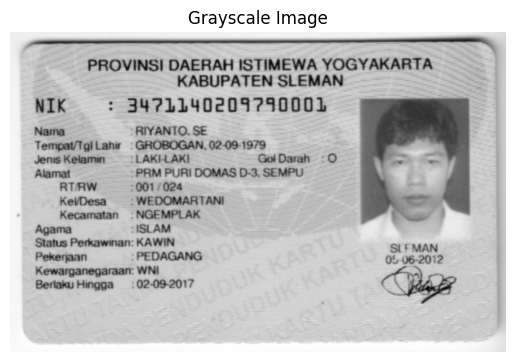

In [16]:
# Step 2: Convert to Grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

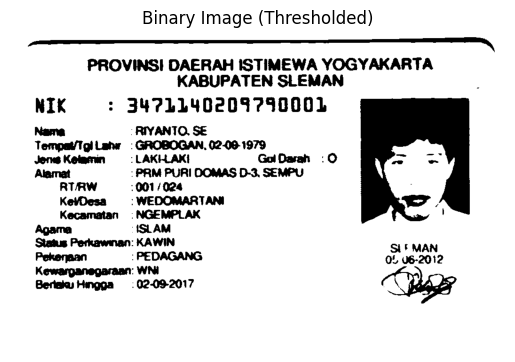

In [17]:
# Step 3: Apply Thresholding (Otsu’s method for binarization)
_, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image (Thresholded)")
plt.axis("off")
plt.show()

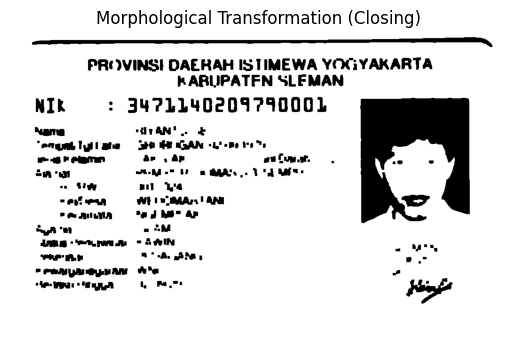

In [18]:
# Step 4: Apply Morphological Transformations (Closing to refine character separation)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morphed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

# Display the morphologically transformed image
plt.imshow(morphed_img, cmap='gray')
plt.title("Morphological Transformation (Closing)")
plt.axis("off")
plt.show()

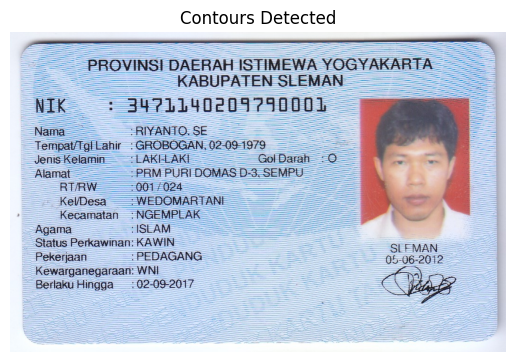

In [19]:
# Step 5: Contour Detection to isolate individual characters or features
contours, hierarchy = cv2.findContours(morphed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_img = src.copy()
for contour in contours:
    area = cv2.contourArea(contour)
    if 100 < area < 1000:  # Adjust these values based on your needs
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contour_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert image to RGB for displaying with matplotlib
contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

# Display the image with contours
plt.imshow(contour_img_rgb)
plt.title("Contours Detected")
plt.axis("off")
plt.show()